**OUMZIL ZIAD EDDINE**

*25/09/2023*

*Modèles stochastiques en finance MAP 552*

# <center> Computer Problem Set 1.1
# <center> The Cox-Ross-Rubinstein mode

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm


$1-a)$ The vector of possible prices at time $j$
\begin{align*}
Sn(T,n,b, \sigma, j) &= \left( S_j^n(i) \right)_{\{i=0...j\}} \\
                     &= \left( S_0u^{j-i}d
                     ^i \right)_{\{i=0...j\}} \\
                     &= \left( S_0e^{bjh_n+(j-2i)\sigma \sqrt{h_n}} \right)_{\{i=0...j\}} \\
                     &= \left( S_0e^{bj\frac{T}{n}+(j-2i)\sigma \sqrt{\frac{T}{n}}} \right)_{\{i=0...j\}}
\end{align*}


In [112]:
def Sn(S,T,n,b,sig,j) :
    # S : is the initial price of the asset
    h = T/n
    u = np.exp(b*h+sig*np.sqrt(h))
    d = np.exp(b*h-sig*np.sqrt(h))
    Sj= np.zeros(j+1)
    for i in range(j+1):
      Sj[i]=S*u**(j-i)*d**i
    return Sj


In [113]:
#Input of the test
sig = 0.3
r = 0.05
b = 0.05
S = 100
T = 2
K = 80
n = 50
K_max = 80+40+1 #try Ki=K to K_max-1


$1-b)$
The payoff of the option at maturity is $(S_n^n-K)^+$

Hence the possible payoffs at maturity are given by the binomial model :
\begin{align*}
Payoffn(T,n,b, \sigma, K) &= \left( (S_n^n(i)-K)^+ \right)_{\{i=0...n\}} \\
                     &= \left( (S_0u^{n-i}v^i-K)^+ \right)_{\{i=0...n\}} \\
                     &= \left( (S_0e^{bn\frac{T}{n}+(n-2i)\sigma \sqrt{\frac{T}{n}}} - K)^+ \right)_{\{i=0...n\}}
\end{align*}

In [114]:
def g(S,K) :
  return np.maximum(S-K,0)
def Payoffn(S,T,n,b,sig,K) :
  SN = Sn(S,T,n,b,sig,n)
  p = g(SN,K)
  return p


$1-c)$ By the law of the no-arbitrage, the price of the European call option is given by:

$$Calln(T,n,r,b,\sigma,K) = e^{-rT}\mathbb{E}^{\mathbb{Q}_n}[(S^n_n-K)^+]$$

Where $\mathbb{Q}_n$ is the risk-neutral measure and defined by :

$$\mathbb{Q}_n[S^n_1 = S_0u] = 1-\mathbb{Q}_n[S^n_1 = S_0d] = q_n = \frac{e^{rh_n}-d}{u-d} $$

$S^n_n$ follow a binomial distribution with parameters $(n,q_n)$

Hence the value of the price

\begin{align*}
Calln(T,n,r,b,\sigma,K) &=  e^{-rT}\mathbb{E}^{\mathbb{Q}_n}[(S^n_n-K)^+] \\
                        &= e^{-rT} \large\sum_{i=0}^{n} g(S_n^n[i])C^{n-i}_n(1-q_n)^iq_n^{n-i}
\end{align*}

where $g(S)=(S-K)^+$


In [115]:
def Calln(S,T,n,r,b,sig,K) :
  SN = Sn(S,T,n,b,sig,n)
  h = T/n
  u = np.exp(b*h+sig*np.sqrt(h))
  d = np.exp(b*h-sig*np.sqrt(h))

  Ex = 0 # the expected value of (S^n_n-K)^+
  q = (np.exp(r*h)-d)/(u-d)
  for i in range(n) :
    Ex += g(SN[i],K)*binom.pmf(n-i, n, q)

  Call = np.exp(-r*T)*Ex
  return Call



$1-d)$ the possible value of $\theta^n_j$ that correspond to the perfect hedging strategy is given by,

$$\theta^n_j(i)= \frac{call(T,n,r,b,\sigma,K,j+1)[i]-call(T,n,r,b,\sigma,K,j+1)[i+1]}{uS^n_j[i]-dS^n_j[i]}$$

where $i \in \{1,...,j\}$, and $call(T,n,r,b,\sigma,K,j+1)[i]$ is the no-arbitrage price of the European Call at time $(j+1)$ that correspond to the price $S^n_{j+1}[i]$ of the asset at time $(j+1)$ which is given by the formula:

\begin{align*}
call(T,n,r,b,\sigma,K,j)[i] &=  e^{-rh(n-j)}\mathbb{E}^{\mathbb{Q_n}}_j[(S^n_n-K)^+| S_j=S^n_j[i]]\\
                        &= e^{-rh(n-j)} \large\sum_{k=0}^{n-j}
                         g(S_j^n[i]*S_{n-j}^n[k])C^{(n-j)-k}_{n-j}(1-q_n)^kq_n^{(n-j)-k}
\end{align*}

We can check that the price of the call at time $0$ is $Call(T,n,r,b,\sigma,K,0)$

In [116]:
#First we implement the introduced no-arbitrage price vector of the call at time t_j

def call(S,T,n,r,b,sig,K,j):
  Callj = np.zeros(j+1)
  Sj = Sn(S,T,n,b,sig,j) #The possible price at time j
  Sj_bar = Sn(1,T,n,b,sig,n-j) #The possible price at time n-j starting by one unity of the asset (S=1)
  h = T/n
  u = np.exp(b*h+sig*np.sqrt(h))
  d = np.exp(b*h-sig*np.sqrt(h))
  q = (np.exp(r*h)-d)/(u-d)
  for i in range(j+1) :
    for k in range(n-j) :
      Callj[i] += g(Sj[i]*Sj_bar[k],K)*binom.pmf((n-j)-k, n-j, q)
  Callj = np.exp(-r*h*(n-j))*Callj
  return Callj

def Deltan(S,T,n,r,b,sig,K,j) :
  theta = np.zeros(j+1)
  Sj = Sn(S,T,n,b,sig,j)
  h = T/n
  u = np.exp(b*h+sig*np.sqrt(h))
  d = np.exp(b*h-sig*np.sqrt(h))
  B = call(S,T,n,r,b,sig,K,j+1)
  for i in range(j+1):
    theta[i] = (B[i]-B[i+1])/(u*Sj[i]-d*Sj[i])
  return theta

#The value with j=0 is the value of the call at time 0
print(Calln(S,T,n,r,b,sig,K))
print(call(S,T,n,r,b,sig,K,0))
#the value of \theta_0
print(Deltan(S,T,n,r,b,sig,K,0))

32.2215269481821
[32.22152695]
[0.83525572]


$1-e)$
Bellow, we plot three graphics respectively representing the no-arbitrage price of the European Call $Calln$, and the value of $Deltan$ for $j = 0$ and $j=20$

Unsurprisingly, the value of the European Call is **decreasing** respect to the value of the strike $K$. This is a proprety of the price of the call, that we have seen in the first lecture. Without this, an arbitrage opportunity would clearly appear.

In the other side, $Deltan$ is also decreasing respect to the strike


<ipython-input-117-f1f4808521e4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


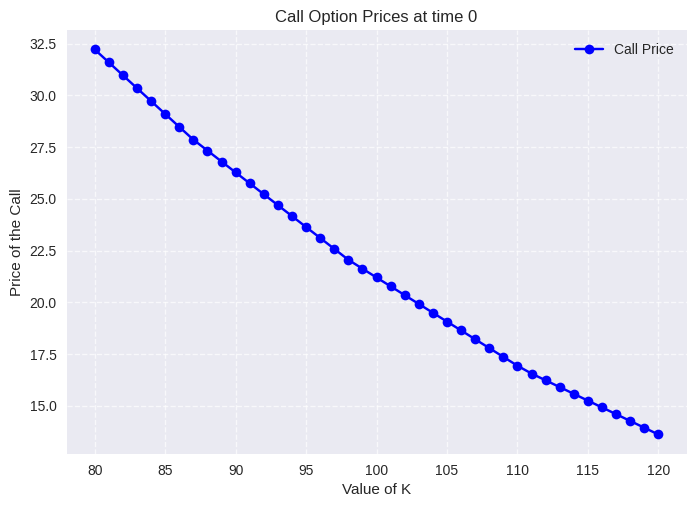

<ipython-input-117-f1f4808521e4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


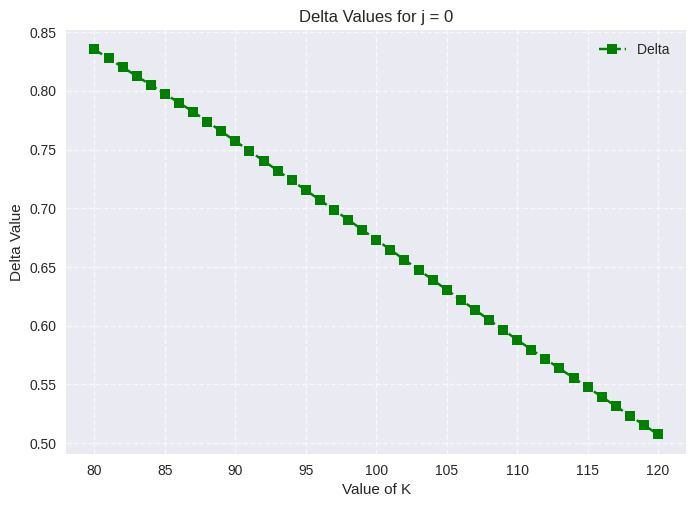

<ipython-input-117-f1f4808521e4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


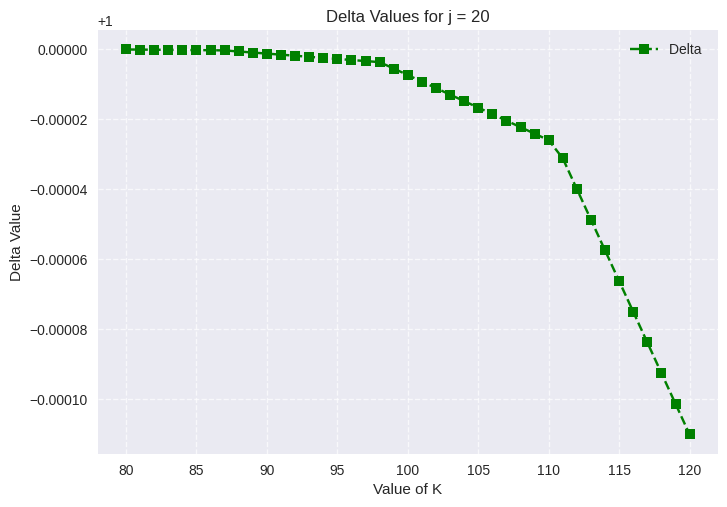

In [117]:

def set_plot_style():
    plt.style.use('seaborn')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.rcParams['axes.facecolor'] = 'lightgray'
    plt.rcParams['figure.figsize'] = (10, 6)

# Function to plot the Call option prices
def plotCall(S, T, n, r, b, sig, K, K_max):
    CallK = []
    X = list(range(K, K_max))
    for k in X:
        CallK.append(Calln(S, T, n, r, b, sig, k))

    set_plot_style()

    plt.plot(X, CallK, label='Call Price', color='b', marker='o', linestyle='-')
    plt.xlabel('Value of K')
    plt.ylabel('Price of the Call')
    plt.title('Call Option Prices at time 0')
    plt.legend()
    plt.show()

# Function to plot the Delta values
def plotDelta(S, T, n, r, b, sig, K, K_max,j):
    DeltaK = []
    X = list(range(K, K_max))
    for k in X:
        DeltaK.append(Deltan(S, T, n, r, b, sig, k, j)[0])

    set_plot_style()

    plt.plot(X, DeltaK, label='Delta ', color='g', marker='s', linestyle='--')
    plt.xlabel('Value of K')
    plt.ylabel('Delta Value')
    plt.title('Delta Values for j = ' + str(j))
    plt.legend()
    plt.show()


plotCall(S,T,n,r,b,sig,K,K_max)
plotDelta(S,T,n,r,b,sig,K,K_max,0)
plotDelta(S,T,n,r,b,sig,K,K_max,20)

$2-a)$
The Black-Scholes price at time zero of the European call option is given by the formula
$$Call(T,r,\sigma,K) = S_0N(d_+(S_0,\widetilde{K},\sigma^2T))-\widetilde{K}N(d_-(S_0,\widetilde{K},\sigma^2T))$$

where

$$\widetilde{K} := Ke^{-rT}, \ \ \ \ d_{\pm}(s,k,v) := \frac{s/k}{\sqrt{v}} \pm \frac{\sqrt{v}}{2}$$


and $N$ is the cumulative distribution function of standard Gaussian $\mathcal{N}(0,1)$

In [118]:
#@ pm : takes either 1 or -1
def d(pm,s,k,v):
  return s/(k*np.sqrt(v)) +  pm*np.sqrt(v)/2

#The function that returns the Black-Scholes price at time zero of the European call option
def Call(S,T,r,sig,K) :
  K_tilde = K*np.exp(-r*T)
  N1 = norm.cdf(d(1,S,K_tilde,sig**2*T))
  N2 = norm.cdf(d(-1,S,K_tilde,sig**2*T))
  return S*N1-K_tilde*N2

$2-b)$ Based on our observation to the plot bellow, we concluse that the relative error converges. Hence there exits a $\gamma$ such that : $$err_n= \frac{Calln(T,n,b,r,\sigma,K)}{Call(T,r,\sigma,K)}-1 = \gamma + o_n(1)$$



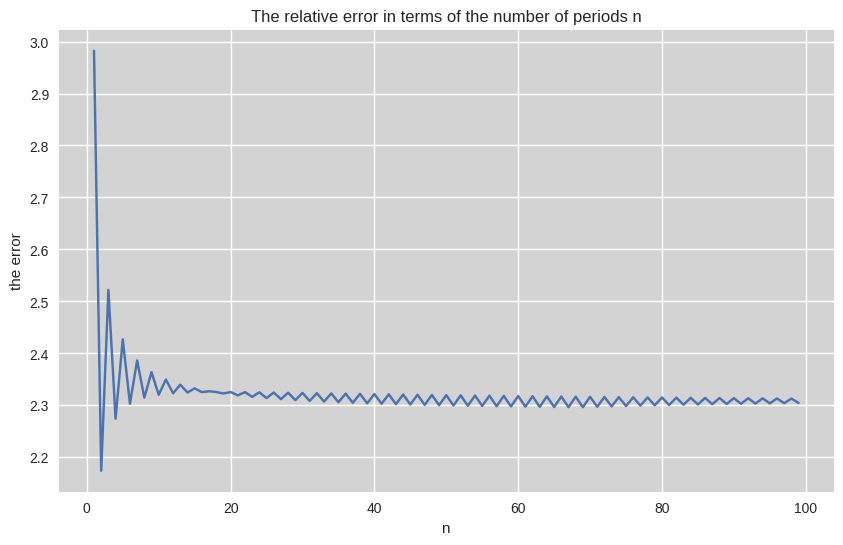

In [119]:
K = 105

def err(S,T,n,r,b,sig,K) :
  return Calln(S,T,n,r,b,sig,K)/Call(S,T,r,sig,K) - 1

arr = []
for n in range(1,100):
  arr.append(err(S,T,n,r,b,sig,K))
plt.plot(range(1,100),arr)
plt.xlabel('n')
plt.ylabel('the error')
plt.title('The relative error in terms of the number of periods n')
plt.show()
